# Linear Regression: Complete Guide

A comprehensive guide to linear regression covering theory, implementation, regularization, and practical applications.

## Table of Contents
1. [Introduction](#introduction)
2. [Mathematical Foundation](#mathematical-foundation)
3. [Types of Linear Regression](#types-of-linear-regression)
4. [Implementation from Scratch](#implementation-from-scratch)
5. [Feature Engineering](#feature-engineering)
6. [Regularization Techniques](#regularization-techniques)
7. [Model Evaluation](#model-evaluation)
8. [Practical Considerations](#practical-considerations)
9. [Advanced Topics](#advanced-topics)
10. [Real-World Applications](#real-world-applications)

## Introduction

Linear regression is one of the most fundamental and widely used algorithms in machine learning and statistics. It models the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to observed data.

### Key Characteristics
- **Supervised Learning**: Requires labeled training data
- **Regression Task**: Predicts continuous numerical values
- **Linear Relationship**: Assumes linear relationship between features and target
- **Interpretable**: Coefficients have clear meaning
- **Foundation**: Basis for many advanced ML algorithms

### When to Use Linear Regression
- **Prediction**: Forecasting continuous values (prices, temperatures, sales)
- **Inference**: Understanding relationships between variables
- **Baseline**: Starting point for more complex models
- **Interpretability**: When model explainability is crucial

## Mathematical Foundation

### 1. Simple Linear Regression (Univariate)

For a single feature, the linear regression model is:

$$y = wx + b$$

Where:
- $y$ = dependent variable (target)
- $x$ = independent variable (feature)
- $w$ = weight (slope/coefficient)
- $b$ = bias (y-intercept)

Note: Some texts use $y = w_0 + w_1x$ notation where $w_0 = b$ (bias) and $w_1 = w$ (weight)

### 2. Multiple Linear Regression (Multivariate)

For multiple features, the model extends to:

$$y = w_1x_1 + w_2x_2 + ... + w_nx_n + b$$

In matrix form:
$$\mathbf{y} = \mathbf{X}\mathbf{w} + \mathbf{b} + \boldsymbol{\epsilon}$$

Where:
- $\mathbf{y}$ = target vector $(m \times 1)$
- $\mathbf{X}$ = feature matrix $(m \times n)$
- $\mathbf{w}$ = weight vector $(n \times 1)$
- $\mathbf{b}$ = bias scalar
- $m$ = number of samples
- $n$ = number of features

### 3. Cost Function (Mean Squared Error)

The objective is to minimize the Mean Squared Error:

$$J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^2$$

Where:
- $\hat{y}^{(i)} = w^T x^{(i)} + b$ (predicted value)
- $y^{(i)}$ = actual value
- $m$ = number of training examples

In [1]:
# Implementation of cost function
import numpy as np

def calculate_cost(y, y_hat):
    """
    Calculate Mean Squared Error cost function
    
    Args:
        y: actual values
        y_hat: predicted values
    
    Returns:
        cost: MSE cost
    """
    return np.mean((y - y_hat) ** 2) / 2

# Example usage
y_actual = np.array([1, 2, 3, 4, 5])
y_predicted = np.array([1.1, 1.9, 3.1, 3.9, 5.1])
cost = calculate_cost(y_actual, y_predicted)
print(f"Cost: {cost:.4f}")

Cost: 0.0050


### 4. Gradient Descent Optimization

To minimize the cost function, we use gradient descent:

**Weight Update:**
$$w_j := w_j - \alpha \frac{\partial J}{\partial w_j}$$

**Bias Update:**
$$b := b - \alpha \frac{\partial J}{\partial b}$$

**Gradients:**
$$\frac{\partial J}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) x_j^{(i)}$$

$$\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})$$

Where $\alpha$ is the learning rate.

In [2]:
# Implementation of gradient computation
def compute_gradients(X, y, y_hat):
    """
    Compute gradients for weights and bias
    
    Args:
        X: feature matrix
        y: actual values
        y_hat: predicted values
    
    Returns:
        dw: gradient for weights
        db: gradient for bias
    """
    m = len(y)
    dw = (1/m) * np.dot(X.T, (y_hat - y))
    db = (1/m) * np.sum(y_hat - y)
    return dw, db

def update_parameters(weights, bias, dw, db, learning_rate):
    """
    Update parameters using gradients
    
    Args:
        weights: current weights
        bias: current bias
        dw: weight gradients
        db: bias gradient
        learning_rate: learning rate
    
    Returns:
        updated weights and bias
    """
    weights = weights - learning_rate * dw
    bias = bias - learning_rate * db
    return weights, bias

# Example usage
X = np.array([[1, 2], [2, 3], [3, 4]])
y = np.array([3, 5, 7])
weights = np.array([0.5, 0.5])
bias = 0.1
y_hat = np.dot(X, weights) + bias

dw, db = compute_gradients(X, y, y_hat)
print(f"Weight gradients: {dw}")
print(f"Bias gradient: {db:.4f}")

weights_new, bias_new = update_parameters(weights, bias, dw, db, learning_rate=0.01)
print(f"Updated weights: {weights_new}")
print(f"Updated bias: {bias_new:.4f}")

Weight gradients: [-5.46666667 -7.86666667]
Bias gradient: -2.4000
Updated weights: [0.55466667 0.57866667]
Updated bias: 0.1240


## Types of Linear Regression

### 1. Simple Linear Regression
- **Single feature**: One independent variable
- **Use case**: Understanding basic relationships
- **Example**: House size vs. price

### 2. Multiple Linear Regression
- **Multiple features**: Several independent variables
- **Use case**: Complex real-world problems
- **Example**: House price based on size, bedrooms, age

### 3. Polynomial Regression
- **Non-linear relationships**: Using polynomial features
- **Mathematical form**: $y = w_0 + w_1x + w_2x^2 + ... + w_nx^n$
- **Use case**: Capturing curved relationships

### 4. Regularized Linear Regression
- **Ridge (L2)**: Penalizes large weights
- **Lasso (L1)**: Promotes sparsity (feature selection)
- **Elastic Net**: Combines L1 and L2 penalties

## Implementation from Scratch

Let's implement a complete Linear Regression class from scratch:

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, learning_rate=0.01, max_iterations=1000):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []
    
    def initialize_parameters(self, n_features):
        """Initialize weights and bias"""
        self.weights = np.random.randn(n_features) * 0.01
        self.bias = 0.0
    
    def predict(self, X):
        """Make predictions"""
        return np.dot(X, self.weights) + self.bias
    
    def compute_cost(self, y_true, y_pred):
        """Compute Mean Squared Error"""
        return np.mean((y_true - y_pred) ** 2) / 2
    
    def compute_gradients(self, X, y_true, y_pred):
        """Compute gradients for weights and bias"""
        m = len(y_true)
        dw = (1/m) * np.dot(X.T, (y_pred - y_true))
        db = (1/m) * np.sum(y_pred - y_true)
        return dw, db
    
    def fit(self, X, y):
        """Train the model using gradient descent"""
        # Initialize parameters
        self.initialize_parameters(X.shape[1])
        
        # Training loop
        for i in range(self.max_iterations):
            # Forward pass
            y_pred = self.predict(X)
            
            # Compute cost
            cost = self.compute_cost(y, y_pred)
            self.cost_history.append(cost)
            
            # Compute gradients
            dw, db = self.compute_gradients(X, y, y_pred)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Progress reporting
            if i % 100 == 0:
                print(f"Iteration {i}: Cost = {cost:.6f}")
    
    def evaluate(self, X, y):
        """Evaluate model performance"""
        y_pred = self.predict(X)
        
        # R² Score
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        
        # Mean Squared Error
        mse = np.mean((y - y_pred) ** 2)
        
        # Root Mean Squared Error
        rmse = np.sqrt(mse)
        
        return {'r2': r2, 'mse': mse, 'rmse': rmse}

print("✅ LinearRegression class implemented successfully!")

✅ LinearRegression class implemented successfully!


### Example: House Price Prediction

Let's test our implementation with a simple example:

In [6]:
# Generate sample house price data
np.random.seed(42)
n_samples = 100

# Features: size (sqft), bedrooms, age
size = np.random.normal(2000, 500, n_samples)
bedrooms = np.random.randint(1, 6, n_samples)
age = np.random.randint(0, 50, n_samples)

# Target: price with some linear relationship + noise
prices = (100 * size + 50000 * bedrooms - 2000 * age + 100000 + 
          np.random.normal(0, 25000, n_samples))

# Create feature matrix
X = np.column_stack([size, bedrooms, age])
y = prices

# Normalize features (important for gradient descent)
X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)

print(f"Dataset shape: {X.shape}")
print(f"Feature means: {X.mean(axis=0)}")
print(f"Target mean: {y.mean():.2f}")

Dataset shape: (100, 3)
Feature means: [1948.0767413    2.68        27.73     ]
Target mean: 376166.87


In [7]:
# Train the model
model = LinearRegression(learning_rate=0.01, max_iterations=1000)
model.fit(X_normalized, y)

# Evaluate the model
metrics = model.evaluate(X_normalized, y)
print(f"\nModel Performance:")
print(f"R² Score: {metrics['r2']:.4f}")
print(f"MSE: {metrics['mse']:.2f}")
print(f"RMSE: {metrics['rmse']:.2f}")

print(f"\nLearned Parameters:")
print(f"Weights: {model.weights}")
print(f"Bias: {model.bias:.2f}")

Iteration 0: Cost = 74290732632.056000
Iteration 100: Cost = 10279134532.465357
Iteration 200: Cost = 1666939887.860200
Iteration 300: Cost = 503919354.042874
Iteration 400: Cost = 345805471.355663
Iteration 500: Cost = 324036741.116159
Iteration 600: Cost = 320968323.539319
Iteration 700: Cost = 320517304.919422
Iteration 800: Cost = 320446313.692691
Iteration 900: Cost = 320433995.694195

Model Performance:
R² Score: 0.9095
MSE: 640863196.31
RMSE: 25315.28

Learned Parameters:
Weights: [ 44502.12184737  64310.42309487 -26285.00197743]
Bias: 376150.63


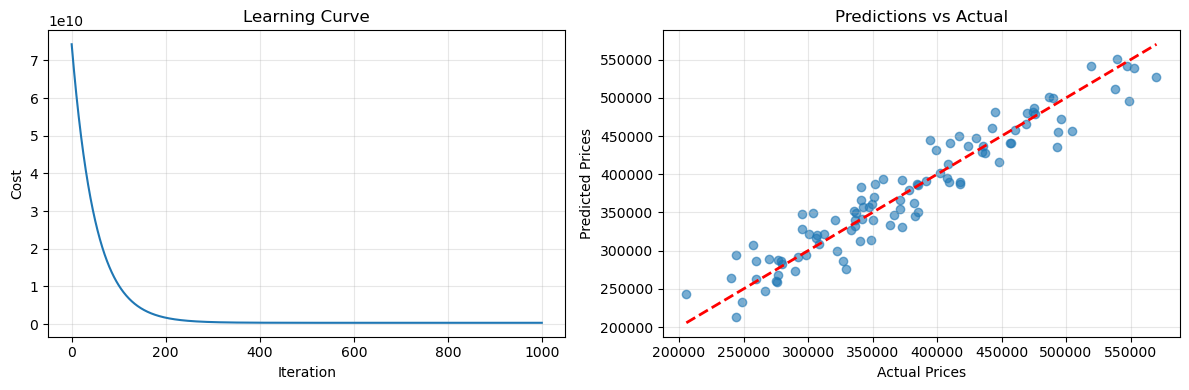

In [8]:
# Visualize training progress
plt.figure(figsize=(12, 4))

# Plot 1: Learning curve
plt.subplot(1, 2, 1)
plt.plot(model.cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Learning Curve')
plt.grid(True, alpha=0.3)

# Plot 2: Predictions vs Actual
plt.subplot(1, 2, 2)
y_pred = model.predict(X_normalized)
plt.scatter(y, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predictions vs Actual')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Regularization Techniques

Regularization helps prevent overfitting by adding penalty terms to the cost function.

### 1. Ridge Regression (L2 Regularization)

**Cost Function:**
$$J_{ridge}(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^2 + \lambda \sum_{j=1}^{n} w_j^2$$

**Characteristics:**
- Shrinks weights towards zero
- Doesn't eliminate features completely
- Good for handling multicollinearity
- Keeps all features but reduces their impact

In [ ]:
class RidgeRegression(LinearRegression):
    def __init__(self, alpha=1.0, learning_rate=0.01, max_iterations=1000):
        super().__init__(learning_rate, max_iterations)
        self.alpha = alpha
    
    def compute_cost(self, y_true, y_pred):
        """Compute cost with L2 regularization"""
        mse_cost = super().compute_cost(y_true, y_pred)
        l2_penalty = self.alpha * np.sum(self.weights ** 2)
        return mse_cost + l2_penalty
    
    def compute_gradients(self, X, y_true, y_pred):
        """Compute gradients with L2 regularization"""
        dw, db = super().compute_gradients(X, y_true, y_pred)
        dw += 2 * self.alpha * self.weights
        return dw, db

print("✅ RidgeRegression class implemented!")

### 2. Lasso Regression (L1 Regularization)

**Cost Function:**
$$J_{lasso}(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^2 + \lambda \sum_{j=1}^{n} |w_j|$$

**Characteristics:**
- Can set weights exactly to zero
- Automatic feature selection
- Produces sparse models
- Good when many features are irrelevant

In [ ]:
class LassoRegression(LinearRegression):
    def __init__(self, alpha=1.0, learning_rate=0.01, max_iterations=1000):
        super().__init__(learning_rate, max_iterations)
        self.alpha = alpha
    
    def compute_cost(self, y_true, y_pred):
        """Compute cost with L1 regularization"""
        mse_cost = super().compute_cost(y_true, y_pred)
        l1_penalty = self.alpha * np.sum(np.abs(self.weights))
        return mse_cost + l1_penalty
    
    def compute_gradients(self, X, y_true, y_pred):
        """Compute gradients with L1 regularization"""
        dw, db = super().compute_gradients(X, y_true, y_pred)
        l1_gradient = np.where(self.weights > 0, 1, 
                              np.where(self.weights < 0, -1, 0))
        dw += self.alpha * l1_gradient
        return dw, db

print("✅ LassoRegression class implemented!")

### 3. Elastic Net (L1 + L2)

**Cost Function:**
$$J_{elastic}(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^2 + \lambda_1 \sum_{j=1}^{n} |w_j| + \lambda_2 \sum_{j=1}^{n} w_j^2$$

**Characteristics:**
- Combines benefits of Ridge and Lasso
- Handles correlated features better than Lasso
- Provides feature selection with stability

In [ ]:
# Compare different regularization techniques
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features to demonstrate overfitting
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_normalized)

print(f"Original features: {X_normalized.shape[1]}")
print(f"Polynomial features: {X_poly.shape[1]}")

# Train different models
models = {
    'Linear': LinearRegression(learning_rate=0.01, max_iterations=1000),
    'Ridge': RidgeRegression(alpha=0.1, learning_rate=0.01, max_iterations=1000),
    'Lasso': LassoRegression(alpha=0.01, learning_rate=0.01, max_iterations=1000)
}

results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_poly, y)
    metrics = model.evaluate(X_poly, y)
    results[name] = {
        'r2': metrics['r2'],
        'rmse': metrics['rmse'],
        'weights_norm': np.linalg.norm(model.weights),
        'non_zero_weights': np.sum(np.abs(model.weights) > 1e-6)
    }
    print(f"R²: {metrics['r2']:.4f}, RMSE: {metrics['rmse']:.2f}")
    print(f"Weights norm: {results[name]['weights_norm']:.4f}")
    print(f"Non-zero weights: {results[name]['non_zero_weights']}/{len(model.weights)}")

## Model Evaluation

### Key Regression Metrics

**R² Score (Coefficient of Determination):**
$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}} = 1 - \frac{\sum_{i=1}^{m}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{m}(y_i - \bar{y})^2}$$

**Interpretation:**
- 1.0: Perfect fit
- 0.7-0.9: Good fit
- 0.5-0.7: Moderate fit
- < 0.5: Poor fit

**Mean Squared Error (MSE):**
$$MSE = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2$$

**Root Mean Squared Error (RMSE):**
$$RMSE = \sqrt{MSE}$$

**Mean Absolute Error (MAE):**
$$MAE = \frac{1}{m} \sum_{i=1}^{m} |y_i - \hat{y}_i|$$

In [ ]:
def comprehensive_evaluation(model, X, y, model_name="Model"):
    """Perform comprehensive model evaluation"""
    y_pred = model.predict(X)
    
    # Calculate metrics
    mse = np.mean((y - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y - y_pred))
    
    # R² Score
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    
    print(f"\n{model_name} Evaluation:")
    print(f"R² Score: {r2:.4f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    
    return {'r2': r2, 'mse': mse, 'rmse': rmse, 'mae': mae}

# Evaluate our trained models
for name, model in models.items():
    comprehensive_evaluation(model, X_poly, y, name)

### Residual Analysis

Residual analysis helps validate model assumptions and identify potential issues:

In [ ]:
def analyze_residuals(model, X, y, model_name="Model"):
    """Analyze model residuals"""
    y_pred = model.predict(X)
    residuals = y - y_pred
    
    plt.figure(figsize=(15, 4))
    
    # Residuals vs Predicted
    plt.subplot(1, 3, 1)
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{model_name}: Residuals vs Predicted')
    plt.grid(True, alpha=0.3)
    
    # Histogram of residuals
    plt.subplot(1, 3, 2)
    plt.hist(residuals, bins=20, alpha=0.7, edgecolor='black')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(f'{model_name}: Distribution of Residuals')
    plt.grid(True, alpha=0.3)
    
    # Q-Q plot (simplified)
    plt.subplot(1, 3, 3)
    sorted_residuals = np.sort(residuals)
    normal_quantiles = np.random.normal(0, np.std(residuals), len(residuals))
    normal_quantiles.sort()
    plt.scatter(normal_quantiles, sorted_residuals, alpha=0.6)
    plt.plot([normal_quantiles.min(), normal_quantiles.max()], 
             [sorted_residuals.min(), sorted_residuals.max()], 'r--')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.title(f'{model_name}: Q-Q Plot')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return residuals

# Analyze residuals for Ridge regression
residuals = analyze_residuals(models['Ridge'], X_poly, y, 'Ridge Regression')

## Practical Considerations

### 1. Assumptions of Linear Regression

**Linearity**: Relationship between features and target is linear
- **Check**: Scatter plots, residual plots
- **Solution**: Polynomial features, transformations

**Independence**: Observations are independent
- **Check**: Domain knowledge, autocorrelation tests
- **Solution**: Time series methods if violated

**Homoscedasticity**: Constant variance of residuals
- **Check**: Residuals vs fitted plot
- **Solution**: Weighted least squares, transformations

**Normality**: Residuals are normally distributed
- **Check**: Q-Q plots, Shapiro-Wilk test
- **Solution**: Robust regression, transformations

**No Multicollinearity**: Features are not highly correlated
- **Check**: Correlation matrix, VIF (Variance Inflation Factor)
- **Solution**: Feature selection, regularization

In [ ]:
# Check for multicollinearity
def check_multicollinearity(X, feature_names=None):
    """Check correlation between features"""
    correlation_matrix = np.corrcoef(X.T)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
    plt.colorbar()
    plt.title('Feature Correlation Matrix')
    
    if feature_names:
        plt.xticks(range(len(feature_names)), feature_names, rotation=45)
        plt.yticks(range(len(feature_names)), feature_names)
    
    # Add correlation values
    for i in range(len(correlation_matrix)):
        for j in range(len(correlation_matrix)):
            plt.text(j, i, f'{correlation_matrix[i, j]:.2f}', 
                    ha='center', va='center', color='white' if abs(correlation_matrix[i, j]) > 0.5 else 'black')
    
    plt.tight_layout()
    plt.show()
    
    return correlation_matrix

# Check multicollinearity in our original features
feature_names = ['Size', 'Bedrooms', 'Age']
corr_matrix = check_multicollinearity(X_normalized, feature_names)

## Real-World Applications

### 1. House Price Prediction
- **Features**: Size, bedrooms, location, age
- **Target**: Price
- **Considerations**: Non-linear relationships, outliers

### 2. Sales Forecasting
- **Features**: Marketing spend, seasonality, economic indicators
- **Target**: Sales volume
- **Considerations**: Time series aspects, external factors

### 3. Medical Diagnosis
- **Features**: Patient measurements, test results
- **Target**: Risk scores, treatment outcomes
- **Considerations**: Interpretability, regulatory requirements

### 4. Financial Modeling
- **Features**: Market indicators, company metrics
- **Target**: Stock prices, credit scores
- **Considerations**: Non-stationarity, regime changes

## Best Practices

### 1. Data Preparation
- **Clean Data**: Handle missing values, outliers
- **Feature Engineering**: Create meaningful features
- **Scaling**: Normalize/standardize features
- **Split Data**: Proper train/validation/test splits

### 2. Model Development
- **Start Simple**: Begin with basic linear regression
- **Add Complexity**: Gradually introduce regularization, polynomial features
- **Cross-Validate**: Use proper validation techniques
- **Monitor Overfitting**: Watch training vs validation performance

### 3. Model Evaluation
- **Multiple Metrics**: Don't rely on single metric
- **Residual Analysis**: Check model assumptions
- **Business Context**: Evaluate practical significance
- **Robustness**: Test on different data subsets

### 4. Production Considerations
- **Interpretability**: Ensure model can be explained
- **Monitoring**: Track model performance over time
- **Retraining**: Update model with new data
- **Documentation**: Maintain clear documentation

## Conclusion

Linear regression is a powerful and interpretable algorithm that serves as the foundation for many machine learning techniques. Understanding its mathematical principles, implementation details, and practical considerations is crucial for any data scientist or machine learning practitioner.

### Key Takeaways:
- **Mathematical Foundation**: Understanding the underlying mathematics enables better model development
- **Implementation Skills**: Building from scratch provides deep insights
- **Regularization**: Essential for handling overfitting and feature selection
- **Evaluation**: Proper evaluation techniques are crucial for model reliability
- **Practical Application**: Real-world considerations often require adaptations

This comprehensive guide provides the theoretical knowledge and practical skills needed to effectively apply linear regression to real-world problems while understanding its limitations and appropriate use cases.

### Next Steps:
1. Practice with different datasets
2. Experiment with feature engineering techniques
3. Compare with other regression algorithms
4. Apply to your own projects
5. Study advanced topics like Bayesian linear regression